# Estimation Error

In estimating numerical solutions to problems, it is important to distinguish between accuracy and the stability of the estimation. If an estimation method is said to be accurate, then we were are referring to the method's ability to approach a given solution over some step $k$. The stability of a method refers to the ability of the method to maintain some level of accuracy without decreasing as the function grows.

To show the difference, let's examine some of the estimation methods that we have seen so far. Below we will be comparing the explicit, trapezoidal, and exact solutions to a given problem in python:

<ipython-input-3-f94fd86beb36>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


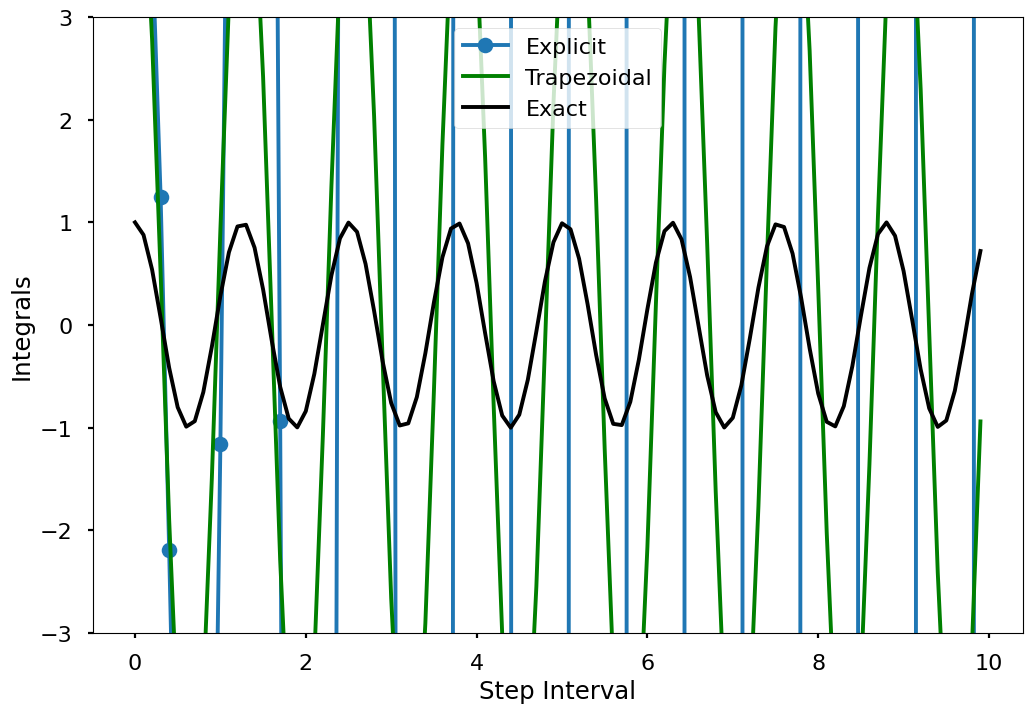

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

# define variables
k = 0.1
t = np.arange(0, 10, k)
O = 5
g0 = np.array([[5], [0]])

d_explicit = np.array([[1, k], [-O**2*k, 1]])
d_trap = np.dot(inv(np.array([[1, -k/2], [O**2*k/2,1]])), np.array([[1,k/2], [-O**2*k/2, 1]]))

# define integration intervals
g_explicit = np.zeros((len(t), 2))
g_trap = np.zeros((len(t), 2))
g_exact = np.cos(O*t)

# perform integrate function according to methods
g_explicit[0, :] = g0.T
g_trap[0, :] = g0.T

for j in range(0, len(t)-1):
    g_explicit[j+1, :] = np.dot(d_explicit, g_explicit[j, :])
    g_trap[j+1, :] = np.dot(d_trap, g_trap[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t, g_explicit[:,0], 'o-')
plt.plot(t, g_trap[:,0], 'g-')
plt.plot(t, g_exact, 'k')
plt.ylim([-3, 3])
plt.xlabel('Step Interval')
plt.ylabel('Integrals')
plt.legend(['Explicit', 'Trapezoidal', 'Exact'])
plt.show()